In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('wine.csv')

In [3]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [5]:
data2=data.iloc[:,1:]
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
# Converting Data to numpy Array
data_arry=data2.values
data_arry

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
# Normalization of data
data_norm=scale(data_arry)
data_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [8]:
# Applying PCA to dataset
pca=PCA(n_components=3)

In [9]:
pca_values=pca.fit_transform(data_norm)
pca_values.shape

(178, 3)

In [47]:
# The amount of variance that each PCA has
variance=pca.explained_variance_ratio_
variance

array([0.36198848, 0.1920749 , 0.11123631])

In [48]:
# Cummulative variance of each PCA
cummulative_var=np.cumsum(np.round(variance,decimals=4)*100)
cummulative_var

array([36.2 , 55.41, 66.53])

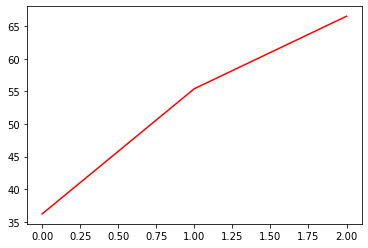

In [49]:
# Variance plot for PCA components obtained 
plt.plot(cummulative_var,color='red')

In [50]:
# Final Dataframe
final_df=pd.concat([data['Type'],pd.DataFrame(pca_values[:,0:3],columns=['PCA1','PCA2','PCA3'])],axis=1)
final_df

,Type,PCA1,PCA2,PCA3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688
...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570
174,3,-2.601956,-1.757229,0.207581
175,3,-2.677839,-2.760899,-0.940942
176,3,-2.387017,-2.297347,-0.550696


<AxesSubplot:>

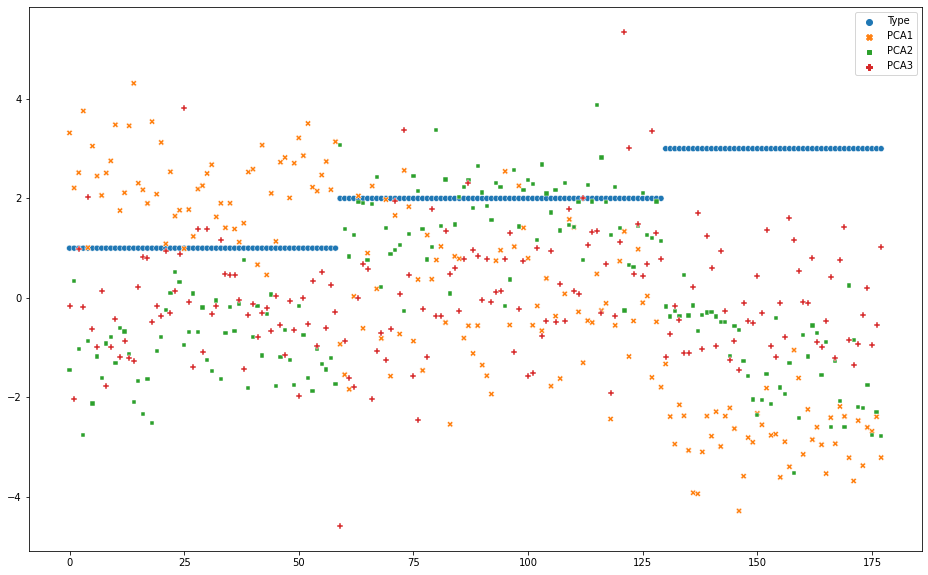

In [51]:
# Visualization of PCAs
fig=plt.figure(figsize=(16,10))
sns.scatterplot(data=final_df)

# Checking with other Clustering Algorithms

# 1. Hierarchical Clustering

In [15]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


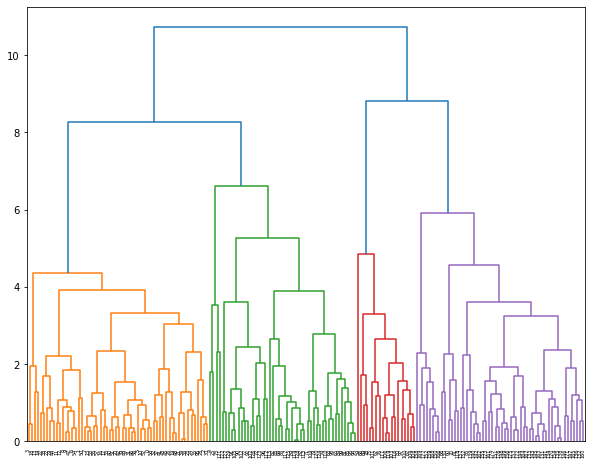

In [52]:
# Creating Dendrogram 
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(final_df,'complete'))

In [53]:
# Creating Clusters
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hclusters

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [18]:
hcluster_id=hclusters.fit_predict(final_df)
hcluster_id

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0,
       2, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [19]:
clusterID=pd.DataFrame(hcluster_id,columns=['clusterid'])
clusterID

,clusterid
0,0
1,0
2,0
3,0
4,0
...,...
173,1
174,1
175,1
176,1


In [20]:
clusterID.value_counts()

clusterid
0            105
1             54
2             19
dtype: int64

In [21]:
# Adding clusters to the DataFrame 
data3=data.copy()
data4=pd.concat((final_df,clusterID),axis=1)
data4

,Type,PCA1,PCA2,PCA3,clusterid
0,1,3.316751,-1.443463,-0.165739,0
1,1,2.209465,0.333393,-2.026457,0
2,1,2.516740,-1.031151,0.982819,0
3,1,3.757066,-2.756372,-0.176192,0
4,1,1.008908,-0.869831,2.026688,0
...,...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570,1
174,3,-2.601956,-1.757229,0.207581,1
175,3,-2.677839,-2.760899,-0.940942,1
176,3,-2.387017,-2.297347,-0.550696,1


In [22]:
data4.iloc[:,:].groupby(data4.clusterid).mean()

,Type,PCA1,PCA2,PCA3
clusterid,,,,
0,1.438095,1.313975,0.120590,0.357938
1,2.888889,-2.641654,-1.017061,-0.266749
2,2.000000,0.246418,2.224177,-1.219950


# 2. K-Means Clustering

In [23]:
from sklearn.cluster import KMeans

C:\Users\Ajay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


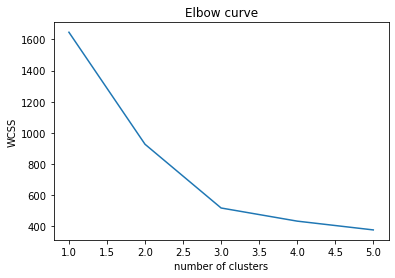

In [26]:
WCSS=[]
for i in range (1,6):
    Kmeans=KMeans(n_clusters=i,random_state=0)
    Kmeans.fit(final_df)
    WCSS.append(Kmeans.inertia_)

plt.plot(range(1,6),WCSS)
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# creating Clustering model
model=KMeans(n_clusters=3)

In [28]:
model.fit(final_df)

KMeans(n_clusters=3)

In [29]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [54]:
# Adding clusters to Dataset
data["clusterid"]=model.labels_
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [46]:
data.clusterid.value_counts()

2    66
0    62
1    50
Name: clusterid, dtype: int64